# Artificial Neural Networks (ANNs)
<hr style="border:2px solid black">

## 1. Introduction

>- computing systems inspired by the biological neural networks in animal brains
>- based on a collection of connected units that loosely model the brain neurons

### 1.1 Biological Neurons

<img src="neuron_med.jpeg" alt="drawing" width="600"/>

- `Dendrites`: receptors picking up signals, through the neurotransmitters, from other neurons
<br>
<br>
- `Soma`: cell body interpreting the signal
<br>
<br>
- `Axon hillock`: at this point signals have action potential; strong enough signals transmitted to the axon surrounded by Myelin
<br>
<br>
- `Axon terminals`: at this point new release of neurotransmitters is possible

### 1.2 Artificial Neuron (Perceptron)

>- building block of ANNs, conceptually derived from biological neurons
>- each artificial neuron has inputs and produces a single output which can be sent to multiple other neurons
>- input node is similar to the first signal sent to the dendrites that receive the signal

<img src="neuron1.png" alt="drawing" width="600"/>

**mathematical formula**
>$$
\hat{y}~=~f\left(1\!\cdot\!w_0+x_1w_1+x_2w_2+\cdots\right)
$$

**how it works**

>1. inputs are multiplied by the pre-defined weights, and hence enhanced/decreased
>2. weighted inputs are summed along with a bias term to be fed into an activation function
>3. non-linear activation function defines an output

### 1.3 Feed Forward Networks

> multi-layer perceptrons, with interconnected layers of neurons

<img src="neuron2.png" alt="drawing" width="600"/>

**mathematical formula**
>$$
z_i~=~f^{hidden}\left(1\!\cdot\!w_{0,\,i}^{\,hidden}+x_1w_{1,\,i}^{\,hidden}+x_2w_{2,\,i}^{\,hidden}+\cdots\right),\quad i=1,2,\ldots\\
\hat{y}~=~f^{out}\left(1\!\cdot\!w_0^{\,out}+z_1w_1^{\,out}+z_2w_2^{\,out}+\cdots\right)
$$

**how it works**

>1. depending on signal strengths and threshold of each neuron at a layer, each neuron emits an output
>2. output of a neuron is sent to next layer, reminiscent of axon terminals in the biological neurons
>3. next layer behaves similarly with each neuron's own threshold
>4. signals from final hidden layer to output layer are combined for matching expected output in training data
>5. the error is calculated, the weights are adjusted and the whole process is repeated for new sample

<hr style="border:2px solid black">

## 2. Feed Forward Network Implementation

**imports**

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

**load data**

In [2]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=50,noise=0.2,random_state=42)

df_x = pd.DataFrame( {'x1':X[:,0], 'x2':X[:,1]} )

**check data shape**

In [3]:
df_x.head()

,x1,x2
0,-0.158570,0.984806
1,1.109004,-0.621602
2,0.396415,0.207409
3,1.792391,0.075113
4,-0.847393,0.711543


In [4]:
df_x.shape

(50, 2)

In [5]:
y.shape

(50,)

**plot data**

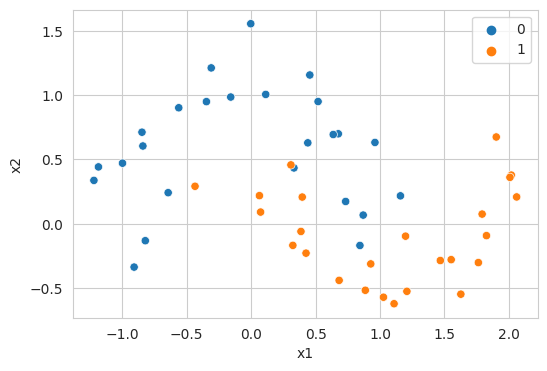

In [6]:
plt.figure(figsize=(6,4),dpi=100)
sns.scatterplot(
    x=df_x['x1'],
    y=df_x['x2'],
    hue=y
);

**add bias**

In [7]:
df_x['x0'] = np.ones(df_x.shape[0])

In [8]:
df_x.head()

,x1,x2,x0
0,-0.158570,0.984806,1.0
1,1.109004,-0.621602,1.0
2,0.396415,0.207409,1.0
3,1.792391,0.075113,1.0
4,-0.847393,0.711543,1.0


**hidden-layer weights**

In [9]:
np.random.seed(30)

In [10]:
weights_h = pd.DataFrame(
    data=np.random.normal(size = (3,2)),
    index=['w1','w2','w0'],
    columns=['neuron_1','neuron_2']
)

In [11]:
weights_h

,neuron_1,neuron_2
w1,-1.264053,1.527905
w2,-0.970711,0.470560
w0,-0.100697,0.303793


**sigmoid activation function**
>$$
z~=~\sigma\left(w_0+x_1w_1+x_2w_2+\cdots\right)~=~\frac{\mathrm{1} }
{\mathrm{1} + e^{-\left(w_0+x_1w_1+x_2w_2+\cdots\right)} }
$$

In [12]:
def sigmoid(argument):
    """returns sigmoid function of its argument
    """
    sigma = 1/(1+np.exp(-argument))
    return sigma

**hidden-layer outputs**

In [13]:
df_z = pd.DataFrame(
    data=sigmoid( np.dot(df_x, weights_h) ),
    columns=['z1','z2']
)

In [14]:
df_z.head()

,z1,z2
0,0.298130,0.628298
1,0.289227,0.846284
2,0.309358,0.732448
3,0.080226,0.955965
4,0.569485,0.341612


**add bias**

In [15]:
df_z['z0'] = np.ones(df_z.shape[0])

In [16]:
df_z.head()

,z1,z2,z0
0,0.298130,0.628298,1.0
1,0.289227,0.846284,1.0
2,0.309358,0.732448,1.0
3,0.080226,0.955965,1.0
4,0.569485,0.341612,1.0


**output-layer weights**

In [17]:
weights_o = pd.DataFrame(
    data=np.random.normal(size = (3,1)),
    index=['w1','w2','w0'],
    columns=['value']
)

In [18]:
weights_o

,value
w1,-1.725962
w2,1.585095
w0,0.134297


**output-layer output**

In [19]:
df_output = pd.DataFrame(
    data=sigmoid( np.dot(df_z, weights_o) ),
    columns=['y_float']
)

In [20]:
df_output['y_pred'] = df_output['y_float'].round().astype(np.int64)

In [21]:
df_output.head()

,y_float,y_pred
0,0.649228,1
1,0.726421,1
2,0.681648,1
3,0.819228,1
4,0.423816,0


**accuracy**

In [22]:
from sklearn.metrics import accuracy_score

y_pred = df_output['y_pred']

accuracy_score(y, y_pred)                                      

0.64

**plot results**

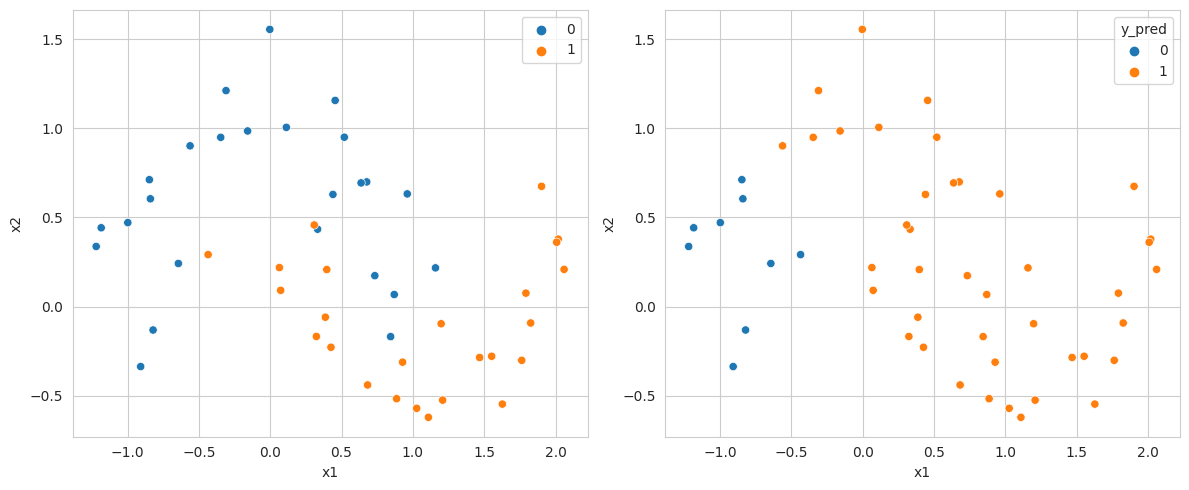

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=100)

for i,j in enumerate([y,y_pred]):
    sns.scatterplot( x=df_x['x1'], y=df_x['x2'], hue=j, ax=axes[i] )

plt.tight_layout()

**what does the result mean?**

>- we would not take the initial result seriously, since the weights were random
>- we need an algorithm to learn the weights 
>- `Backpropagation` along with `Gradient Descent` will update the weights

<hr style="border:2px solid black">

## References

- [Historical timeline of Artificial Neural Networks](https://www.datasciencecentral.com/most-cited-deep-learning-papers/)
- [The neural network zoo](https://www.asimovinstitute.org/neural-network-zoo/)